### `Reinforcement learning is the process of learning by interacting with an environment`

--------------------------------------------------------------------------------------------------------------------

### `installing the important libraries and modules`

In [ ]:
!pip install cmake 'gym[atari]' scipy

In [ ]:
!pip install gym[toy_text]

In [1]:
import random
from IPython.display import clear_output
import numpy as np
from time import sleep
import pandas as pd

----------------------------------------------------------------------------------------------------------------

## `my functions`

In [2]:
def showEnvInfo(env):
    print("Action Space {}".format(env.action_space))
    print("State  Space {}".format(env.observation_space))

In [3]:
def brute_force(env):
    epochs = 0
    penalties, rewards = 0, 0

    frames = [] # for animation

    done = False

    while not done:
        action = env.action_space.sample()
        state, reward, done, info = env.step(action)

        if reward == -10:
            penalties += 1

        if reward > 0:
            rewards += 1

        # Put each rendered frame into dict for animation
        frames.append({
            'frame': env.render(mode='ansi'),
            'state': state,
            'action': action,
            'reward': reward
            })

        epochs += 1


    print("Timesteps taken: {}".format(epochs))
    print("Penalties incurred: {}".format(penalties))
    return frames

In [4]:
def print_frames(frames):
    for i, frame in enumerate(frames):
        clear_output(wait=True)
        print(frame['frame'])
        print(f"Timestep: {i + 1}")
        print(f"State: {frame['state']}")
        print(f"Action: {frame['action']}")
        print(f"Reward: {frame['reward']}")
        sleep(1)

In [5]:
def trainTheAgent(env,alpha=0.1,gamma=0.6,epsilon=0.1):
    """Training the agent"""

    # Initialize the q table
    q_table = np.zeros([env.observation_space.n, env.action_space.n])

    # For plotting metrics
    all_epochs = []
    all_penalties = []

    for i in range(1, 100001):
        state = env.reset()

        epochs, penalties, reward, = 0, 0, 0
        done = False

        while not done:
            if random.uniform(0, 1) < epsilon:
                action = env.action_space.sample() # Explore action space
            else:
                action = np.argmax(q_table[state]) # Exploit learned values

            next_state, reward, done, info = env.step(action) 

            old_value = q_table[state, action]
            next_max = np.max(q_table[next_state])

            new_value = (1 - alpha) * old_value + alpha * (reward + gamma * next_max)
            q_table[state, action] = new_value

            if reward == -10:
                penalties += 1

            state = next_state
            epochs += 1

        if i % 100 == 0:
            clear_output(wait=True)
            print(f"Episode: {i}")

    print("Training finished.\n")
    return q_table

In [6]:
def evaluateTheAgent(q_table,episodes = 1000):
    """Evaluate agent's performance after Q-learning"""
    total_epochs, total_penalties = 0, 0
    for _ in range(episodes):
        state = env.reset()
        epochs, penalties, reward = 0, 0, 0

        done = False

        while not done:
            action = np.argmax(q_table[state])
            state, reward, done, info = env.step(action)

            if reward == -10:
                penalties += 1

            epochs += 1

        total_penalties += penalties
        total_epochs += epochs

    print(f"Results after {episodes} episodes:")
    print(f"Average timesteps per episode: {total_epochs / episodes}")
    print(f"Average penalties per episode: {total_penalties / episodes}")
    avr_time = total_epochs / episodes
    avr_pen  = total_penalties / episodes
    return avr_time , avr_pen

In [38]:
def optimizedTraining(env,alpha=0.1,gamma=0.6,epsilon=0.1):
    """Training the agent"""

    # Initialize the q table
    q_table = np.zeros([env.observation_space.n, env.action_space.n])
    # For plotting metrics
    all_epochs = []
    all_penalties = []

    for i in range(1, 100001):

        if i in [10000,25000,40000,55000,70000,85000,90000]:
            epsilon = epsilon*0.1
#             gamma = gamma-0.005
#             alpha = alpha*0.5

        state = env.reset()

        epochs, penalties, reward, = 0, 0, 0
        done = False

        while not done:
            if random.uniform(0, 1) < epsilon:
                action = env.action_space.sample() # Explore action space
            else:
                action = np.argmax(q_table[state]) # Exploit learned values

            next_state, reward, done, info = env.step(action) 

            old_value = q_table[state, action]
            next_max = np.max(q_table[next_state])

            new_value = (1 - alpha) * old_value + alpha * (reward + gamma * next_max)
            q_table[state, action] = new_value

            if reward == -10:
                penalties += 1

            state = next_state
            epochs += 1

        if i % 100 == 0:
            clear_output(wait=True)
            print(f"Episode: {i}")

    print("Training finished.\n")
    return q_table

-----------------------------------------------------------------------------------------------------------------

### `Gym`

Gym is released by Open AI in 2016. It is a toolkit for developing and comparing reinforcement learning algorithms.

In [8]:
import gym # openAi gym
from gym import envs

# show all the possible game environments in gym 
print(envs.registry.values())

dict_values([EnvSpec(id='ALE/Tetris-v5', entry_point='gym.envs.atari:AtariEnv', reward_threshold=None, nondeterministic=False, max_episode_steps=27000, order_enforce=True, autoreset=False, kwargs={'game': 'tetris', 'obs_type': 'rgb', 'repeat_action_probability': 0.25, 'full_action_space': False, 'frameskip': 4}, namespace='ALE', name='Tetris', version=5), EnvSpec(id='ALE/Tetris-ram-v5', entry_point='gym.envs.atari:AtariEnv', reward_threshold=None, nondeterministic=False, max_episode_steps=27000, order_enforce=True, autoreset=False, kwargs={'game': 'tetris', 'obs_type': 'ram', 'repeat_action_probability': 0.25, 'full_action_space': False, 'frameskip': 4}, namespace='ALE', name='Tetris-ram', version=5), EnvSpec(id='Adventure-v0', entry_point='gym.envs.atari:AtariEnv', reward_threshold=None, nondeterministic=False, max_episode_steps=10000, order_enforce=True, autoreset=False, kwargs={'game': 'adventure', 'obs_type': 'rgb', 'repeat_action_probability': 0.25, 'full_action_space': False, 'fr

/home/amjad/anaconda3/lib/python3.7/site-packages/gym/envs/registration.py:424: UserWarning: WARN: Custom namespace `ALE` is being overridden by namespace `ALE`. If you are developing a plugin you shouldn't specify a namespace in `register` calls. The namespace is specified through the entry point package metadata.
  f"Custom namespace `{spec.namespace}` is being overridden "


--------------------------------------------------------------------------------------------------------------------

### `taxi game`

`Actions`: There are 6 discrete deterministic actions:
    * 0: move south
    * 1: move north
    * 2: move east 
    * 3: move west 
    * 4: pickup passenger
    * 5: dropoff passenger
`Rewards`: There is a reward of :
    * -1  for each action and an additional reward of 
    * +20 for delievering the passenger. There is a reward of 
    * -10 for executing actions "pickup" and "dropoff" illegally.
`Rendering`:
    * blue: passenger
    * magenta: destination
    * yellow: empty taxi
    * green: full taxi
    * other letters: locations

### `choose the environment`

In [9]:
env = gym.make('Taxi-v3')
# env.reset()
# env.render()

### `show the action space and the state space of an environment`

In [10]:
showEnvInfo(env)

Action Space Discrete(6)
State  Space Discrete(500)


#### ` check state depending on user parameter `

In [11]:
state = env.encode(3, 1, 2, 0) # (taxi row, taxi column, passenger index, destination index)
print("State:", state)

# env.s = state
# env.render()


State: 328


`the reward table` When the Taxi environment is created, there is an initial Reward table that's also created, called `P`. 

In [12]:
# the default reward values assigned to a given state
env.P[state]

{0: [(1.0, 428, -1, False)],
 1: [(1.0, 228, -1, False)],
 2: [(1.0, 348, -1, False)],
 3: [(1.0, 328, -1, False)],
 4: [(1.0, 328, -10, False)],
 5: [(1.0, 328, -10, False)]}

----------------------------------------------------------------------------------------------------------------

### `Brute-force approach`
`Solving the environment without Reinforcement Learning`

Since we have our P table for default rewards in each state, we can try to have our taxi navigate just using that.

We'll create an infinite loop which runs until one passenger reaches one destination (one episode), or in other words, when the received reward is 20. The env.action_space.sample() method automatically selects one random action from set of all possible actions.

In [13]:
env.s = 328  # set environment to illustration's state
frames=brute_force(env)

Timesteps taken: 200
Penalties incurred: 69


In [14]:
print(len(frames))

200


In [15]:
print_frames(frames)

+---------+
|R: | : :G|
| : | :_: |
| : : : : |
| | : | : |
|Y| : |B: |
+---------+
  (Dropoff)

Timestep: 200
State: 177
Action: 5
Reward: -10


`the evaluation of Brute-force approach :`

+ Not good. Our agent takes thousands of timesteps and makes lots of wrong drop offs to deliver just one passengerto the right destination.

+ This is because we aren't learning from past experience. We can run this over and over, and it will never optimize. The agent has no memory of which action was best for each state, which is exactly what Reinforcement Learning will do for us.

---------------------------------------------------------------------------------------------------------------

## Q-learning approach

+ The core of the idea is the Q-matrix Q(s, a). 
    + It contains the maximum discounted future reward when we perform action a in state s. Or in other words Q(s, a) gives estimates the best course of action a in state s.
    
+ Q-learning lets the agent use the environment's rewards to learn, over time, the best action to take in a given state.

+ we have the reward table, P, that the agent will learn from. It does thing by looking receiving a reward for taking an action in the current state, then updating a Q-value to remember if that action was beneficial.

+ The values store in the Q-table are called a Q-values, and they map to a (state, action) combination.





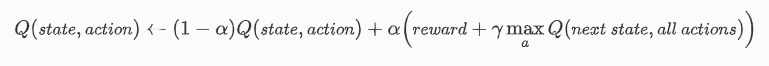


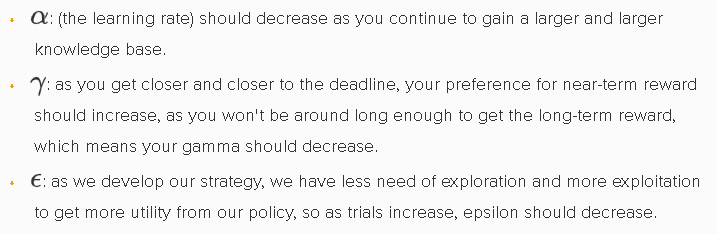

## Training the agent

In [16]:
# Hyperparameters
alpha = 0.1
gamma = 0.6
epsilon = 0.1

q_table=trainTheAgent(env,alpha,gamma,epsilon)

Episode: 100000
Training finished.



In [17]:
env.encode

<bound method TaxiEnv.encode of <gym.envs.toy_text.taxi.TaxiEnv object at 0x7f1a9be8b750>>

In [18]:
# Create the pandas DataFrame

df = pd.DataFrame(q_table)
df

,0,1,2,3,4,5
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1,-2.418371,-2.363951,-2.418371,-2.363951,-2.273252,-11.363950
2,-1.870144,-1.450240,-1.870144,-1.450240,-0.750400,-10.450238
3,-2.363951,-2.273252,-2.363951,-2.273252,-2.122086,-11.273252
4,-2.496192,-2.496650,-2.496192,-2.496861,-9.879304,-9.052992
...,...,...,...,...,...,...
495,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
496,-2.142047,-2.122065,-2.158180,-2.122064,-6.734701,-5.713853
497,-1.049266,0.416000,-1.006699,-1.262171,-5.172504,-4.072211
498,-2.130487,-2.122071,-2.170415,-2.122070,-6.277734,-2.871487


In [19]:
q_table[328]

array([ -2.38833015,  -2.27325184,  -2.41198134,  -2.35749418,
       -10.68247952, -10.08038733])

# Evalutation

Let's evaluate the performance of our agent. 
+ We don't need to explore actions any further, so now the next action is always selected using the best Q-value

In [20]:
episodes = 1500
avr_time , avr_pen = evaluateTheAgent(q_table,episodes)

Results after 1500 episodes:
Average timesteps per episode: 13.125333333333334
Average penalties per episode: 0.0


### `Grid-search`

In [21]:
# alpha   = [0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
# gamma   = [0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
# epsilon = [0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]

alpha   = [0.1,0.2,0.3]
gamma   = [0.2,0.4,0.6]
epsilon = [0.1,0.2,0.3]
episodes = 1000
lst = []
for a in alpha:
    for g in gamma:
        for e in epsilon:
            # train the model 
            q_table=trainTheAgent(env,a,g,e)
            # evaluate the model 
            avr_time , avr_pen = evaluateTheAgent(q_table,episodes)
            lst.append([a,g,e,avr_time,avr_pen])
#             print(f"alpha : {a} ,gamma :{g} ,epsilon :{e}")
#             print(f"average time :{avr_time}")
#             print(f"average penalties:{avr_pen}")
            print("==========================================================================")

Episode: 100000
Training finished.

Results after 1000 episodes:
Average timesteps per episode: 13.099
Average penalties per episode: 0.0


In [22]:
df2 = pd.DataFrame(lst,columns=['alpha','gamma','epsilon','average timestamps','average penelitties'])
df2

,alpha,gamma,epsilon,average timestamps,average penelitties
0,0.1,0.2,0.1,13.078,0.0
1,0.1,0.2,0.2,13.247,0.0
2,0.1,0.2,0.3,13.165,0.0
3,0.1,0.4,0.1,13.009,0.0
4,0.1,0.4,0.2,12.936,0.0
5,0.1,0.4,0.3,12.962,0.0
6,0.1,0.6,0.1,13.057,0.0
7,0.1,0.6,0.2,13.121,0.0
8,0.1,0.6,0.3,13.028,0.0
9,0.2,0.2,0.1,12.972,0.0


### `training with decay the epsilon`

In [47]:
# Hyperparameters
alpha = 0.2
gamma = 0.3
epsilon = 0.1

q_table3=optimizedTraining(env,alpha,gamma,epsilon)
# Create the pandas DataFrame

df3 = pd.DataFrame(q_table3)
df3

Episode: 100000
Training finished.



,0,1,2,3,4,5
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1,-1.428530,-1.428443,-1.428531,-1.428441,-1.428150,-10.402969
2,-1.423381,-1.412881,-1.422596,-1.412522,-1.376500,-10.314607
3,-1.428418,-1.428066,-1.428416,-1.428082,-1.427166,-9.961342
4,-1.428571,-1.428571,-1.428571,-1.428571,-8.219044,-9.293971
...,...,...,...,...,...,...
495,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
496,-1.425589,-1.425868,-1.425928,-1.425624,-6.092563,-6.091202
497,-1.297153,-1.255058,-1.279848,-1.284897,-2.000000,-6.923742
498,-1.426618,-1.426568,-1.426637,-1.426553,-3.655874,-6.057609


In [48]:
episodes = 1500
avr_time , avr_pen = evaluateTheAgent(q_table3,episodes)

Results after 1500 episodes:
Average timesteps per episode: 13.003333333333334
Average penalties per episode: 0.0


### `References`

1. https://www.kaggle.com/code/charel/learn-by-example-reinforcement-learning-with-gym
2. https://www.learndatasci.com/tutorials/reinforcement-q-learning-scratch-python-openai-gym/
3. https://youtu.be/-WbN61qtTGQ